<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

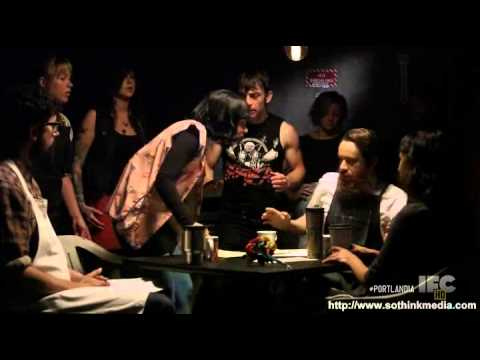

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jisha/Desktop/Lambda_Course_Work/Coursework/Unit4/Unit_410_NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/jiobu1/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

### **1. The date needs to be removed or put in its own column**

In [6]:
import re

dates=[]
for text in shops["full_review_text"]:
    dates.append(re.findall(r"\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b", text)[0])

shops["review_date"]=dates
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016


### **2. Remove dates and lowercase review text**

In [7]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub("\d+\/\d+\/\d+", "", x))

In [8]:
shops["full_review_text"] = shops["full_review_text"].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

In [9]:
shops["full_review_text"] = shops["full_review_text"].apply(lambda x: x.lower())

In [10]:
shops["full_review_text"].head()

0        check in love love loved the atmosphere  e...
1      listed in date night  austin  ambiance in au...
2        check in listed in brunch spots i loved th...
3      very cool decor  good drinks nice seating  h...
4        check in they are located within the north...
Name: full_review_text, dtype: object

### **3. Make star rating a float column**

In [11]:
shops["star_rating"]=shops["star_rating"].str.replace(" star rating", "")
shops["star_rating"]=shops["star_rating"].astype(float)
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,check in love love loved the atmosphere e...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in au...,4.0,12/2/2016
2,The Factory - Cafe With a Soul,check in listed in brunch spots i loved th...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating h...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,check in they are located within the north...,4.0,12/3/2016


### **4. Check DataFrame after cleanng**

In [12]:
shops.isna().sum()

coffee_shop_name    0
full_review_text    0
star_rating         0
review_date         0
dtype: int64

In [13]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,check in love love loved the atmosphere e...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in au...,4.0,12/2/2016
2,The Factory - Cafe With a Soul,check in listed in brunch spots i loved th...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating h...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,check in they are located within the north...,4.0,12/3/2016


# Clean Data

### **1a. Rating distribution**

In [14]:
shops["star_rating"].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

### **1b. Adding Check-In column**

In [15]:
look_up =["check in"]

def matcher(x):
    for i in look_up:
        if i.lower() in x.lower():
            return 1
    else:
        return 0

shops["check_in"] = shops["full_review_text"].apply(matcher)

In [16]:
shops["full_review_text"] = shops["full_review_text"].apply(lambda x: re.sub("check in", "", x))

### **1c. Trying to Remove Leading Spaces**

In [17]:
shops["full_review_text"] = shops["full_review_text"].str.lstrip()

In [18]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,check_in
0,The Factory - Cafe With a Soul,love love loved the atmosphere every corner o...,5.0,11/25/2016,1
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in aust...,4.0,12/2/2016,0
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4.0,11/30/2016,1
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating how...,2.0,11/25/2016,0
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4.0,12/3/2016,1


### **2. Apply generic nlp stop words**

In [19]:
nlp.Defaults.stop_words

tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops["full_review_text"], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops["tokens"] = tokens

In [20]:
shops["tokens"].head()

0    [love, love, loved, atmosphere,  , corner, cof...
1    [listed, date, night,  , austin,  , ambiance, ...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, decor,  , good, drinks, nice, seating, ...
4    [located, northcross, mall, shopping, center, ...
Name: tokens, dtype: object

In [21]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops["tokens"].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(20)

[(' ', 76762),
 ('  ', 20647),
 ('coffee', 10572),
 ('s', 7684),
 ('place', 5448),
 ('t', 5151),
 ('   ', 4155),
 ('good', 4003),
 ('great', 3939),
 ('like', 3127),
 ('austin', 2347),
 ('    ', 2180),
 ('love', 1946),
 ('m', 1913),
 ('time', 1907),
 ('food', 1880),
 ('ve', 1792),
 ('nice', 1755),
 ('shop', 1727),
 ('friendly', 1706)]

### 3. Adding words to stop words

In [22]:
STOP_WORDS = nlp.Defaults.stop_words.union(["coffee", "got", "place","try", "i'm", "i've", "place", "come", "definitely", "order", "its", "it", "it's", "you're", "didn't", "don't", "shop", "got", "came"," ","  ","s","   ", "t","    " , "don"])

In [23]:
# Tokenizer pipe removing stop words, blank words, and lemmatizing
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != " "):
            doc_tokens.append(token.lemma_)
            
    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops['tokens'].head()

0    [love, love, love, atmosphere, corner, style, ...
1    [list, date, night, austin, ambiance, austin, ...
2    [list, brunch, spot, love, eclectic, homey, pl...
3    [cool, decor, good, drink, nice, seat, overpri...
4    [locate, northcross, mall, center, face, east,...
Name: tokens, dtype: object

### Create a WC DataFrame

In [24]:
def count(docs):
    """
    This function takes a list of tokenized documents as input and returns 
    a dataframe with frequency counts of words in teh document set. 
    
    #Arguements
        docs: list, tokenized list of documents
        
    #Return
        wc: dataframe,
    """
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ["word", "count"])

    wc["rank"] = wc["count"].rank(method="first", ascending=False)
    total = wc["count"].sum()

    wc["pct_total"] = wc["count"].apply(lambda x: x / total)
        
    wc = wc.sort_values(by="rank")
    wc["cul_pct_total"] = wc["pct_total"].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=["word", "appears_in"])
    wc = ac.merge(wc, on="word")

    wc["appears_in_pct"] = wc["appears_in"].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by="rank")

In [25]:
wc_all = count(shops["tokens"])
wc_all.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
135,good,3457,5423,1.0,0.016989,0.016989,0.453913
72,great,2862,3966,2.0,0.012425,0.029414,0.375788
151,like,2286,3403,3.0,0.010661,0.040074,0.300158
22,drink,1675,2415,4.0,0.007566,0.047640,0.219932
436,time,1775,2407,5.0,0.007541,0.055180,0.233062
32,love,1826,2394,6.0,0.007500,0.062680,0.239758
45,austin,1843,2347,7.0,0.007353,0.070033,0.241991
208,little,1570,1975,8.0,0.006187,0.076220,0.206145
570,work,1503,1952,9.0,0.006115,0.082335,0.197348
300,food,1432,1942,10.0,0.006084,0.088419,0.188025


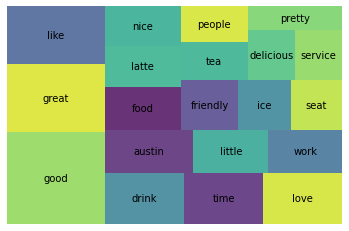

In [26]:
wc_top20 = wc_all[wc_all["rank"] <= 20]

squarify.plot(sizes=wc_top20["pct_total"], label=wc_top20["word"], alpha=.8 )
plt.axis("off")
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [27]:
# Check top words for 4 and 5 ratings
good_coffee = shops[shops['star_rating'] >= 4]
good_count = count(good_coffee['tokens'])
print(good_coffee.shape)
good_count.head(10)

(6140, 6)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
163,good,2739,4277,1.0,0.017160,0.017160,0.446091
72,great,2514,3494,2.0,0.014018,0.031178,0.409446
184,like,1688,2451,3.0,0.009834,0.041011,0.274919
32,love,1613,2137,4.0,0.008574,0.049585,0.262704
45,austin,1591,2049,5.0,0.008221,0.057806,0.259121
22,drink,1306,1793,6.0,0.007194,0.064999,0.212704
345,time,1348,1786,7.0,0.007166,0.072165,0.219544
183,little,1258,1565,8.0,0.006279,0.078444,0.204886
26,latte,1038,1557,9.0,0.006247,0.084690,0.169055
470,work,1195,1538,10.0,0.006171,0.090861,0.194625


In [28]:
# Check top words for 1-3 ratings
bad_coffee = shops[shops['star_rating'] <= 4]
bad_count = count(bad_coffee['tokens'])
print(bad_coffee.shape)
bad_count.head(10)


(3836, 6)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
108,good,1983,3188,1.0,0.017973,0.017973,0.516945
124,like,1383,2123,2.0,0.011969,0.029943,0.360532
44,great,1295,1769,3.0,0.009973,0.039916,0.337591
37,drink,934,1426,4.0,0.008040,0.047955,0.243483
417,time,987,1384,5.0,0.007803,0.055758,0.257299
188,little,920,1190,6.0,0.006709,0.062467,0.239833
282,food,824,1172,7.0,0.006608,0.069075,0.214807
474,work,820,1116,8.0,0.006292,0.075367,0.213764
12,nice,873,1072,9.0,0.006044,0.081410,0.227581
14,austin,816,1019,10.0,0.005745,0.087155,0.212722


In [29]:
gc_top20 = good_count[good_count["rank"] <= 20]
bc_top20 = bad_count[bad_count["rank"] <= 20]

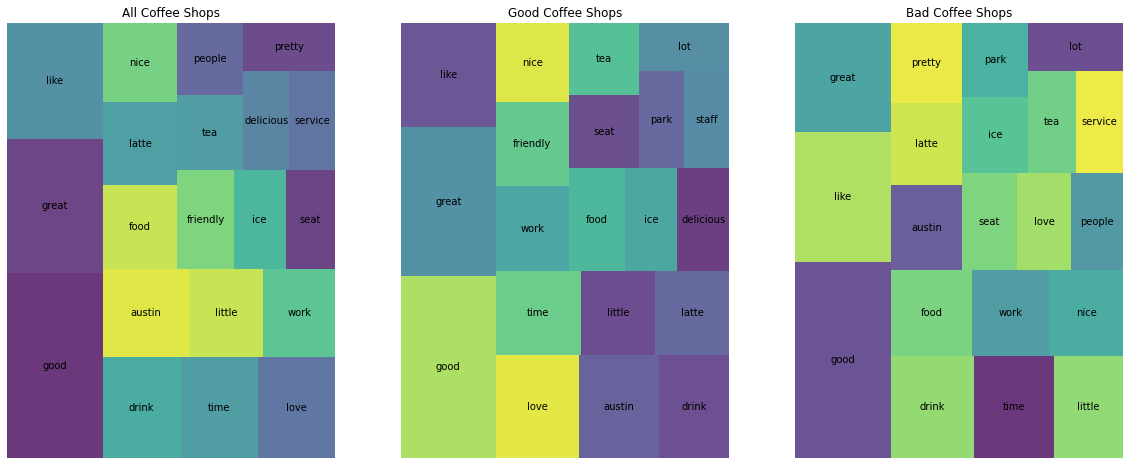

In [30]:
#Comparison

fig, axes = plt.subplots(1, 3, figsize = (20, 8))

axes[0].set_title("All Coffee Shops")
squarify.plot(sizes = wc_top20["pct_total"], label = wc_top20["word"], alpha = .8, ax = axes[0])
axes[0].axis("off")

axes[1].set_title("Good Coffee Shops")
squarify.plot(sizes = gc_top20["pct_total"], label = gc_top20["word"], alpha = .8, ax = axes[1])
axes[1].axis("off")

axes[2].set_title("Bad Coffee Shops")
squarify.plot(sizes = bc_top20["pct_total"], label = bc_top20["word"], alpha = .8, ax = axes[2])
axes[2].axis("off")

plt.show();

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [31]:
word_check = good_count.merge(bad_count, on = "word")
word_check.head()

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y
0,good,2739,4277,1.0,0.017160,0.017160,0.446091,1983,3188,1.0,0.017973,0.017973,0.516945
1,great,2514,3494,2.0,0.014018,0.031178,0.409446,1295,1769,3.0,0.009973,0.039916,0.337591
2,like,1688,2451,3.0,0.009834,0.041011,0.274919,1383,2123,2.0,0.011969,0.029943,0.360532
3,love,1613,2137,4.0,0.008574,0.049585,0.262704,710,883,14.0,0.004978,0.108179,0.185089
4,austin,1591,2049,5.0,0.008221,0.057806,0.259121,816,1019,10.0,0.005745,0.087155,0.212722


In [32]:
word_check["difference"] = word_check.apply(lambda x: abs(x["appears_in_pct_x"] - x["appears_in_pct_y"]), axis = 1)

In [33]:
word_check = word_check.sort_values(by = "difference", ascending = False)
word_check.head()

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y,difference
2,like,1688,2451,3.0,0.009834,0.041011,0.274919,1383,2123,2.0,0.011969,0.029943,0.360532,0.085613
3,love,1613,2137,4.0,0.008574,0.049585,0.262704,710,883,14.0,0.004978,0.108179,0.185089,0.077615
1,great,2514,3494,2.0,0.014018,0.031178,0.409446,1295,1769,3.0,0.009973,0.039916,0.337591,0.071855
14,delicious,1187,1323,15.0,0.005308,0.119178,0.193322,469,508,45.0,0.002864,0.223112,0.122263,0.071060
0,good,2739,4277,1.0,0.017160,0.017160,0.446091,1983,3188,1.0,0.017973,0.017973,0.516945,0.070854


In [34]:
top10 = word_check["word"][:10]
top10

2           like
3           love
1          great
14     delicious
0           good
37         amaze
23        pretty
224         okay
10      friendly
103         star
Name: word, dtype: object

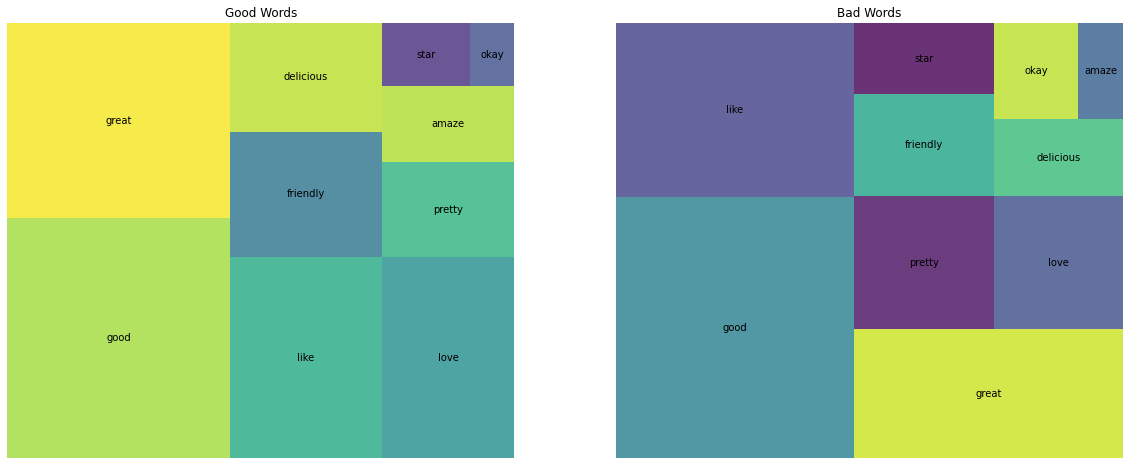

In [35]:
good_10 = good_count.loc[good_count['word'].isin(top10)]
bad_10 = bad_count.loc[bad_count['word'].isin(top10)]

fig, axes = plt.subplots(1, 2, figsize = (20, 8))

axes[0].set_title('Good Words')
squarify.plot(sizes = good_10['pct_total'], label = good_10['word'], alpha = .8, ax = axes[0])
axes[0].axis('off')

axes[1].set_title('Bad Words')
squarify.plot(sizes = bad_10['pct_total'], label = bad_10['word'], alpha = .8, ax = axes[1])
axes[1].axis('off')

plt.show();

There is a difference in how many times the words, great, delicious, love, and friendly are used. 

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

